In [4]:
import os
import pandas as pd
import numpy as np
import json

import acquire
import prepare


In [5]:

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

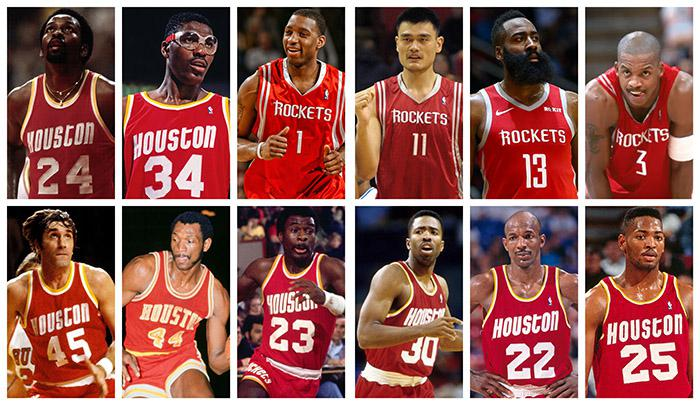

In [7]:
from IPython.display import Image
Image(filename='rockets.jpeg', width=700, height=405)



## Overview

The purpose of this project is to integrate and analyze the diverse range of data collected by the Houston Rockets, including ticket transactions, retail sales, and fan surveys. The current challenge lies in the fact that the data is sourced from various systems and formats, making it difficult to gain comprehensive insights about the team's fan base. By creating a unified database table, this project aims to provide the Business Intelligence & Innovation team with a consolidated dataset that can be leveraged to build fan segments and understand their behaviors effectively.

Need to haves (Deliverables):


First what is needed:

Download project files from https://htxrockets.com/redirect/to/id?id=148

Aquire.py - Script of data acquition of all data from project source files.

Prepare.py - Script of wrangling data to an unified database table that meets the requiremnts of the stakeholder.

final notebook to run project

README



## Data Dictionary

**Tickets.csv** - Ticket sales transactions over the course of 41 home games.

|   Field Name      |   Description                                                     |
|-------------------|-------------------------------------------------------------------|
|   transaction_id  |   identification number for ticket transaction                    |
|   account_no      |   customer account number                                         |
|   email           |   customer email address                                          |
|   zip             |   customer zip code                                               |
|   phone_no        |   customer phone number                                           |
|   section         |   section of the arena that the tickets were purchased for        |
|   row             |   row of the section that the tickets were purchased for          |
|   qty             |   quantity of tickets purchased in transaction                    |
|   total_price     |   total transaction price                                         |
|   event_id        |   identification number for event the tickets were purchased for  |
|   channel         |   distribution channel for ticket transaction                     |



**Retail.json** - Online retail Purchases

|   Field Name      |   Description                                       |
|-------------------|-----------------------------------------------------|
|   transaction_id  |   identification number for the retail transaction  |
|   email           |   customer email address                            |
|   account_no      |   customer account number                           |
|   product_type    |   type of product purchased                         |
|   quantity        |   quantity of items purchased                       |
|   unit_price      |   price per unit                                    |
|   shipping_cost   |   shipping cost for the transaction                 |



**Surveys.csv**  - Melted response data from post-game surveys

|   Field Name                                                        |   Description                                                                                              |
|---------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
|   Submission ID                                                     |   unique identifier for each survey submitted (hint: can be used as index for pivot table of responses)    |
|   phone_no                                                          |   survey respondent phone number                                                                           |
|   event_id                                                          |   identification number for the event related to the survey                                                |
|   how_satisfied_were_you_with_this_event                            |   5-point scale response to question: "How satisfied were you with this event?"                            |
|   how_satisfied_were_you_with_your_retail_experience_at_this_event  |   5-point scale response to question: "How satisfied were you with your retail experience at this event?"  |
|   how_likely_are_you_to_attend_this_event_in_the_future             |   5-point scale response to question: "How likely are you to attend this event in the future?"             |
|   what_is_your_birthdate                                            |   survey respondent's date of birth                                                                        |
|   what_is_your_household_income                                     |   survey respondent's household income range                                                               |
|   what_is_your_highest_level_of_education_that_you_have_attained    |   survey respondent's highest level of education                                                           |

**Unified Database** - single table that used the available data sources to create a unified database table that Business Intelligence & Innovation team could leverage to build fan segments and determine their behaviors.

| email                    	| customer email address                                	|
|--------------------------	|-------------------------------------------------------	|
| phone_no                 	| customer phone number                                 	|
| zip                      	| customer zip code                                     	|
| ticketing_account_no     	| customer account number for ticket purchases          	|
| retail_account_no        	| customer account number for retail purchases          	|
| unique_id                	| customer unique identifer (use as primary key         	|
| retail_spent_sum         	| dollar sum of retail purchases of customer            	|
| ticket_spent_sum         	| dollar sum of ticket purchases of customer            	|
| overall_sum              	| dollar sum of retail and ticket purchases of customer 	|
| total_tickets_purchased  	| overall number of tickets customer purchased          	|
| avg_per_ticket           	| dollar average of customer tickets                    	|
| favorite_section         	| section of the arena where customer is likely to sit  	|
| retail_transaction_count 	| sum of all retail purchases of customer               	|
| ticket_transaction_count 	| sum of all ticket purchases of customer               	|
| survey_submissions       	| sum of survey submissions of customer                 	|
| Hat_purchased            	| number of hats customer purchased                     	|
| Jersey_purchased         	| number of jerseys customer purchased                  	|
| Misc_purchased           	| number of non apparel items customer purchased        	|
| T-shirt_purchased        	| number of t-shirts customer purchased                 	|


## Acquire

In [ ]:
retail_data, survey_data, ticket_data = acquire.import_data(json_file = 'retail.json',
    csv_file1 = 'surveys.csv',
    csv_file2 = 'tickets.csv')

In [ ]:
# Concise summary of dataframe from JSON
print(retail_data.info())
# Preview of dataframe from JSON
retail_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  2000 non-null   int64  
 1   email           2000 non-null   object 
 2   account_no      2000 non-null   object 
 3   product_type    2000 non-null   object 
 4   quantity        2000 non-null   int64  
 5   unit_price      2000 non-null   int64  
 6   shipping_cost   2000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 109.5+ KB
None


,transaction_id,email,account_no,product_type,quantity,unit_price,shipping_cost
0,1,user18@rockets.com,E894194JJ481,Jersey,2,96,5.76
1,2,user142@rockets.com,G684186GK636,Misc,5,9,1.35
2,3,user182@rockets.com,X898402TO472,Jersey,3,98,8.82
3,4,user492@rockets.com,R226999ZA574,Jersey,4,104,12.48
4,5,user101@rockets.com,Q640255YC818,Jersey,3,98,8.82


In [ ]:
# Concise summary of dataframe from csv
print(survey_data.info())
# Preview of survey data
survey_data.head(9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Submission ID  12000 non-null  int64 
 1   Attribute      12000 non-null  object
 2   Value          12000 non-null  object
dtypes: int64(1), object(2)
memory usage: 281.4+ KB
None


,Submission ID,Attribute,Value
0,1,phone_no,290-551-1299
1,1,event_id,3220
2,1,how_satisfied_were_you_with_this_event,2
3,1,how_satisfied_were_you_with_your_retail_experi...,3
4,1,how_likely_are_you_to_attend_this_event_in_the...,5 - Very Likely
5,1,what_is_your_birthdate,33939
6,1,what_is_your_household_income,"Less than $50,000"
7,1,what_is_your_highest_level_of_education_that_y...,Associate's Degree
8,2,phone_no,663-795-4865


In [ ]:
# Concise summary of dataframe from csv
print(ticket_data.info())
# Preview of ticket data
ticket_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  10000 non-null  int64 
 1   account_no      10000 non-null  object
 2   email           10000 non-null  object
 3   zip             10000 non-null  int64 
 4   phone_no        10000 non-null  object
 5   section         10000 non-null  int64 
 6   row             10000 non-null  int64 
 7   qty             10000 non-null  int64 
 8   total_price     10000 non-null  int64 
 9   event_id        10000 non-null  int64 
 10  channel         10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB
None


,transaction_id,account_no,email,zip,phone_no,section,row,qty,total_price,event_id,channel
0,1,A87144476G,user400@rockets.com,77066,280-379-5220,109,9,1,200,3223,Web
1,2,A66578188Z,user141@rockets.com,76673,490-491-8071,101,10,4,800,3221,Box Office
2,3,A11689958W,user98@rockets.com,77031,244-805-9413,100,18,8,1600,3237,Box Office
3,4,A47432461Z,user213@rockets.com,76136,826-458-9773,400,7,1,50,3240,Web
4,5,A80089942I,user472@rockets.com,75559,803-733-6051,414,17,1,25,3215,Box Office


**Takeaways**

- Retail JSON 

    - No nulls.
    - Currently 2000 rows and 1 column.

     **Things to Do**

    - Need to convert to Dataframe with the following fields:
        - transaction_id, email, account_no , product_type, quantity, unit_price , shipping cost. 
        - Dataframe will have 2000 rows with 7 columns.
        

- Ticket data

    - No nulls
    - Dataframe is 10,000 rows and 11 columns

- Survey data

    - No nulls
    - Currently 12,000 rows and 3 columns.

    **Things to Do**
    
    - Need to pivot data on 'Submission ID' = index, 'Attribute' = columns, and 'Value' = values. Final shape will be determine after transforming the data table.
    - Standardize some data fields.

    - After cleaning source data, it will be ready to be utilized constructing unified database.

## Prepare

### Source Data

In [ ]:
retail_data, survey_data, ticket_data = prepare.prep_source_data()

In [ ]:
print(retail_data.info())

retail_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     2000 non-null   int64  
 1   email              2000 non-null   object 
 2   retail_account_no  2000 non-null   object 
 3   product_type       2000 non-null   object 
 4   quantity           2000 non-null   int64  
 5   unit_price         2000 non-null   int64  
 6   shipping_cost      2000 non-null   float64
 7   transaction_total  2000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB
None


,transaction_id,email,retail_account_no,product_type,quantity,unit_price,shipping_cost,transaction_total
0,1,user18@rockets.com,E894194JJ481,Jersey,2,96,5.76,197.76
1,2,user142@rockets.com,G684186GK636,Misc,5,9,1.35,46.35
2,3,user182@rockets.com,X898402TO472,Jersey,3,98,8.82,302.82
3,4,user492@rockets.com,R226999ZA574,Jersey,4,104,12.48,428.48
4,5,user101@rockets.com,Q640255YC818,Jersey,3,98,8.82,302.82


In [ ]:
print(survey_data.info())

survey_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   event_id                                                          1500 non-null   object
 1   how_likely_are_you_to_attend_this_event_in_the_future             1500 non-null   object
 2   how_satisfied_were_you_with_this_event                            1500 non-null   object
 3   how_satisfied_were_you_with_your_retail_experience_at_this_event  1500 non-null   object
 4   phone_no                                                          1500 non-null   object
 5   what_is_your_birthdate                                            1500 non-null   object
 6   what_is_your_highest_level_of_education_that_you_have_attained    1500 non-null   object
 7   what_is_your_household_income              

Attribute,event_id,how_likely_are_you_to_attend_this_event_in_the_future,how_satisfied_were_you_with_this_event,how_satisfied_were_you_with_your_retail_experience_at_this_event,phone_no,what_is_your_birthdate,what_is_your_highest_level_of_education_that_you_have_attained,what_is_your_household_income
Submission ID,,,,,,,,
1,3220,5 - Very Likely,2 - Unlikely,3 - Neutral,290-551-1299,33939,Associate's Degree,"Less than $50,000"
2,3242,1 - Very Unlikely,5 - Very Satisfied,3 - Neutral,663-795-4865,21535,Vocational School,"Less than $50,000"
3,3217,3 - Neutral,4 - Likely,2 - Unlikely,674-251-1148,35693,Graduate Degree,"$100,000 - $149,000"
4,3215,4 - Likely,3 - Neutral,3 - Neutral,728-127-6014,37384,Vocational School,"Less than $50,000"
5,3237,3 - Neutral,5 - Very Satisfied,3 - Neutral,238-199-2712,22531,Vocational School,"$250,00 or more"


In [ ]:
print(ticket_data.info())

ticket_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transaction_id        10000 non-null  int64 
 1   ticketing_account_no  10000 non-null  object
 2   email                 10000 non-null  object
 3   zip                   10000 non-null  int64 
 4   phone_no              10000 non-null  object
 5   section               10000 non-null  int64 
 6   row                   10000 non-null  int64 
 7   qty                   10000 non-null  int64 
 8   total_price           10000 non-null  int64 
 9   event_id              10000 non-null  int64 
 10  channel               10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB
None


,transaction_id,ticketing_account_no,email,zip,phone_no,section,row,qty,total_price,event_id,channel
0,1,A87144476G,user400@rockets.com,77066,280-379-5220,109,9,1,200,3223,Web
1,2,A66578188Z,user141@rockets.com,76673,490-491-8071,101,10,4,800,3221,Box Office
2,3,A11689958W,user98@rockets.com,77031,244-805-9413,100,18,8,1600,3237,Box Office
3,4,A47432461Z,user213@rockets.com,76136,826-458-9773,400,7,1,50,3240,Web
4,5,A80089942I,user472@rockets.com,75559,803-733-6051,414,17,1,25,3215,Box Office


### Wrangle Unified Database

In [ ]:
new_df = prepare.prep_fan_account()

In [ ]:
print(new_df.info())

new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   email                     500 non-null    object 
 1   phone_no                  500 non-null    object 
 2   zip                       500 non-null    int64  
 3   ticketing_account_no      500 non-null    object 
 4   retail_account_no         500 non-null    object 
 5   unique_id                 500 non-null    object 
 6   retail_spent_sum          500 non-null    float64
 7   ticket_spent_sum          500 non-null    int64  
 8   overall_sum               500 non-null    float64
 9   total_tickets_purchased   500 non-null    int64  
 10  avg_per_ticket            500 non-null    float64
 11  favorite_section          500 non-null    int64  
 12  retail_transaction_count  500 non-null    int64  
 13  ticket_transaction_count  500 non-null    int64  
 14  survey_sub

,email,phone_no,zip,ticketing_account_no,retail_account_no,unique_id,retail_spent_sum,ticket_spent_sum,overall_sum,total_tickets_purchased,avg_per_ticket,favorite_section,retail_transaction_count,ticket_transaction_count,survey_submissions,Hat_purchased,Jersey_purchased,Misc_purchased,T-shirt_purchased
0,user18@rockets.com,645-680-2091,77012,A37155507A,E894194JJ481,clutch_1,383.16,4685,5068.16,50,93.70,118,4,15,5,2,1,1,0
1,user142@rockets.com,477-236-9428,77011,A53787758X,G684186GK636,clutch_2,775.59,8460,9235.59,64,132.19,100,3,14,5,0,2,1,0
2,user182@rockets.com,379-724-3829,77459,A53911439N,X898402TO472,clutch_3,478.42,8655,9133.42,103,84.03,120,4,26,1,0,1,2,1
3,user492@rockets.com,585-912-9278,77388,A62517740E,R226999ZA574,clutch_4,1434.79,5310,6744.79,51,104.12,103,5,10,6,1,4,0,0
4,user101@rockets.com,226-568-7645,77388,A82383061F,Q640255YC818,clutch_5,572.68,13340,13912.68,132,101.06,121,4,24,5,1,1,0,2


**Takeaways**

- Constructed Unified database that the Innovation team or Business Intelligence team can utilize. 

The output of the code is the processed fan account dataframe (new_df), which contains the following columns:

- email: The unique email records of fans.
- phone_no: The phone number associated with the fan's ticketing account.
- zip: The zip code associated with the fan's ticketing account.
- ticketing_account_no: The ticketing account number associated with the fan's ticket purchases.
- retail_account_no: The retail account number associated with the fan's retail purchases.
- unique_id: The unique identifier for each fan account. Used as primary key.
- retail_spent_sum: The total dollar amount spent by the fan on retail purchases.
- ticket_spent_sum: The total dollar amount spent by the fan on ticket purchases.
- overall_sum: The overall sum of retail and ticket purchases.
- total_tickets_purchased: The total number of tickets purchased by the fan.
- avg_per_ticket: The average amount spent per ticket by the fan.
- favorite_section: The most frequently purchased section by the fan.
- retail_transaction_count: The number of retail transactions made by the fan.
- ticket_transaction_count: The number of ticket transactions made by the fan.
- survey_submissions: The number of survey submissions made by the fan.
- Hat_purchased: The number of hats purchased by the fan.
- Jersey_purchased: The number of jerseys purchased by the fan.
- Misc_purchased: The number of miscellaneous items purchased by the fan.
- T-shirt_purchased: The number of t-shirts purchased by the fan.

- The database is 500 rows and 19 columns.

- Column "email" was the foundation of the construction of database. Merged field from databases `retail_data` and `ticket_data`, the dropped duplicates.

- Merged columns "email", "phone_no", "zip", and "account_no" as "ticketing_account_no"  from `ticket_data` based on email.

- Merged columns "email' and "account_no" as "retail_account_no" from `retail_data` based on email.

- Created unique id as column "unique_id" for each fan. Unique ID is generated   concatenation of string "clutch_" and index location +1.

- Column "retail_spent_sum" is the result of calculation of sum of dollars spent on retail purchases for each fan. Total includes shipping cost also 

- Column "ticket_spent_sum" is the result of calculation of sum of dollars spent on retail purchases for each fan.





## Conclusion

After acquiring data from data sources provided, I was able to successfully wrangle three data sets to build a unified fan database table that can be used to make business insights. The database is 500 rows and 19 columns.  It contains fans' contact information, summary of spending for retail and ticket purchases for each fan, and an unique identifier for each fan that acts as a primary key.

## Next Steps and Recommendations: 

- Create a Dashboard using unified database
- Add additional demographic data like gender and race.
- Draft and sign Jarrid Jones as to the organization as their new Data Engineer.

<img src= "draft.jpeg" style="width:700px;height:405px"/>